In [869]:
from collections import Counter
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

sns.set()

# Demographic perspective

In [870]:
df_demo_hierarchical=pd.read_csv('df_demo_hierarchical.csv',delimiter=',')
df_demo_k=pd.read_csv('df_demo_k.csv',delimiter=',')
df_demo_mixed=pd.read_csv('df_demo_mixed.csv',delimiter=',')
df_demo_shift=pd.read_csv('df_demo_shift.csv',delimiter=',')
df=pd.read_csv('df_clean.csv',delimiter=',')

In [871]:
df_demo_hierarchical.set_index('customer_id',inplace=True)
df_demo_k.set_index('customer_id',inplace=True)
df_demo_mixed.set_index('customer_id',inplace=True)
df_demo_shift.set_index('customer_id',inplace=True)
df.set_index('customer_id',inplace=True)

In [872]:
df_hierarchical_demo=pd.concat([df_demo_hierarchical['cluster'],df],join='inner',axis=1)
df_hierarchical_demo=df_hierarchical_demo[['cluster','customer_age']]

In [873]:
df_k_demo=pd.concat([df_demo_k['cluster'],df],join='inner',axis=1)
df_k_demo=df_k_demo[['cluster','customer_age']]

In [874]:
df_mixed_demo=pd.concat([df_demo_mixed['cluster'],df],join='inner',axis=1)
df_mixed_demo=df_mixed_demo[['cluster','customer_age']]

In [875]:
df_shift_demo=pd.concat([df_demo_shift['cluster'],df],join='inner',axis=1)
df_shift_demo=df_shift_demo[['cluster','customer_age']]

In [876]:
cluster_means = df_hierarchical_demo.groupby('cluster').mean()['customer_age'].T
cluster_means

cluster
0    23.520958
1    38.855293
2    31.098061
3    53.203675
Name: customer_age, dtype: float64

In [877]:
cluster_means = df_k_demo.groupby('cluster').mean()['customer_age'].T
cluster_means

cluster
0    21.568153
1    40.544349
2    26.733175
3    32.421422
4    54.032986
Name: customer_age, dtype: float64

In [878]:
cluster_means = df_mixed_demo.groupby('cluster').mean()['customer_age'].T
cluster_means

cluster
0    24.515178
1    68.283784
2    36.419741
3    51.276339
Name: customer_age, dtype: float64

In [879]:
cluster_means = df_shift_demo.groupby('cluster').mean()['customer_age'].T
cluster_means

cluster
0    25.701130
1    42.085370
2    59.310345
3    66.708333
4    77.500000
5    72.000000
Name: customer_age, dtype: float64

# Psycographic perspective

In [880]:
df_psy_hierarchical=pd.read_csv('df_psy_hierarchical.csv',delimiter=',')
df_psy_k=pd.read_csv('df_psy_k.csv',delimiter=',')
df_psy_mixed=pd.read_csv('df_psy_mixed.csv',delimiter=',')
df_psy_shift=pd.read_csv('df_psy_shift.csv',delimiter=',')

In [881]:
df_psy_hierarchical.set_index('customer_id',inplace=True)
df_psy_k.set_index('customer_id',inplace=True)
df_psy_mixed.set_index('customer_id',inplace=True)
df_psy_shift.set_index('customer_id',inplace=True)

In [882]:
cuisine_columns=[col for col in df.columns if col.startswith('CUI')]
cuisine_columns=cuisine_columns+['cluster']

In [883]:
df_hierarchical_psy=pd.concat([df_psy_hierarchical['cluster'],df],join='inner',axis=1)
df_hierarchical_psy=df_hierarchical_psy[cuisine_columns]

In [884]:
df_k_psy=pd.concat([df_psy_k['cluster'],df],join='inner',axis=1)
df_k_psy=df_k_psy[cuisine_columns]

In [885]:
df_mixed_psy=pd.concat([df_psy_mixed['cluster'],df],join='inner',axis=1)
df_mixed_psy=df_mixed_psy[cuisine_columns]

In [886]:
df_shift_psy=pd.concat([df_psy_shift['cluster'],df],join='inner',axis=1)
df_shift_psy=df_shift_psy[cuisine_columns]

In [887]:
cuisine_columns.remove('cluster')

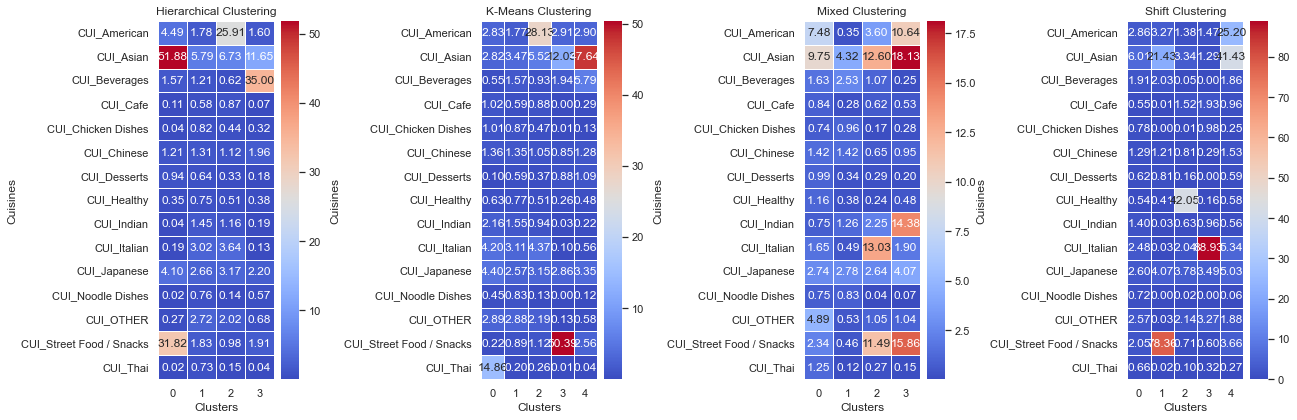

In [888]:
cluster_means_hierarchical = df_hierarchical_psy.groupby('cluster').mean()[cuisine_columns].T
cluster_means_k = df_k_psy.groupby('cluster').mean()[cuisine_columns].T
cluster_means_mixed = df_mixed_psy.groupby('cluster').mean()[cuisine_columns].T
cluster_means_shift = df_shift_psy.groupby('cluster').mean()[cuisine_columns].T
# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))  # Adjust layout: 1 row, 3 columns

# Heatmap for df_hierarchical
sns.heatmap(cluster_means_hierarchical, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0])
axes[0].set_title('Hierarchical Clustering')

# Heatmap for df_k
sns.heatmap(cluster_means_k, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1])
axes[1].set_title('K-Means Clustering')

# Heatmap for df_mixed
sns.heatmap(cluster_means_mixed, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[2])
axes[2].set_title('Mixed Clustering')

sns.heatmap(cluster_means_shift, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[3])
axes[3].set_title('Shift Clustering')

# Set common labels
for ax in axes:
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Cuisines')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Behaviour perspective

In [889]:
df_behaviour_k=pd.read_csv('df_behaviour_k.csv',delimiter=',')
df_behaviour_mixed=pd.read_csv('df_behaviour_mixed.csv',delimiter=',')
df_behaviour_shift=pd.read_csv('df_behaviour_shift.csv',delimiter=',')
df_behaviour_hierarchical=pd.read_csv('df_behaviour_hierarchical.csv',delimiter=',')
df_behaviour_SOM_hie=pd.read_csv('df_behaviour_SOM_hie.csv',delimiter=',')
df_behaviour_SOM_k=pd.read_csv('df_behaviour_SOM_k.csv',delimiter=',')
df_behaviour_SOM_hie.rename(columns={'label':'cluster'},inplace=True)
df_behaviour_SOM_k.rename(columns={'label':'cluster'},inplace=True)

In [890]:
df_behaviour_k.set_index('customer_id',inplace=True)
df_behaviour_mixed.set_index('customer_id',inplace=True)	
df_behaviour_shift.set_index('customer_id',inplace=True)
df_behaviour_hierarchical.set_index('customer_id',inplace=True)
df_behaviour_SOM_hie.set_index('customer_id',inplace=True)
df_behaviour_SOM_k.set_index('customer_id',inplace=True)

In [891]:
collumns=['vendor_count', 'product_count', 'is_chain', 'first_order',
       'last_order', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'Total_Spent', 'order_count', 'Diversity_Cuisine', 'costumer_time',
       'Intensity_of_Activity', 'Customer_loyalty', 'product_intensity',
       'Day_Week_Spread', 'hour_spread']
collumns=collumns+['cluster']

In [892]:
df_hierarchical_behaviour=pd.concat([df_behaviour_hierarchical['cluster'],df],join='inner',axis=1)
df_hierarchical_behaviour = df_hierarchical_behaviour[collumns] 

In [893]:
df_k_behaviour=pd.concat([df_behaviour_k['cluster'],df],join='inner',axis=1)
df_k_behaviour=df_k_behaviour[collumns]

In [894]:
df_mixed_behaviour=pd.concat([df_behaviour_mixed['cluster'],df],join='inner',axis=1)
df_mixed_behaviour=df_mixed_behaviour[collumns]

In [895]:
df_shift_behaviour=pd.concat([df_behaviour_shift['cluster'],df],join='inner',axis=1)
df_shift_behaviour=df_shift_behaviour[collumns]

In [896]:
df_SOM_hie_behaviour=pd.concat([df_behaviour_SOM_hie['cluster'],df],join='inner',axis=1)
df_SOM_hie_behaviour=df_SOM_hie_behaviour[collumns]

In [897]:
df_SOM_k_behaviour=pd.concat([df_behaviour_SOM_k['cluster'],df],join='inner',axis=1)
df_SOM_k_behaviour=df_SOM_k_behaviour[collumns]

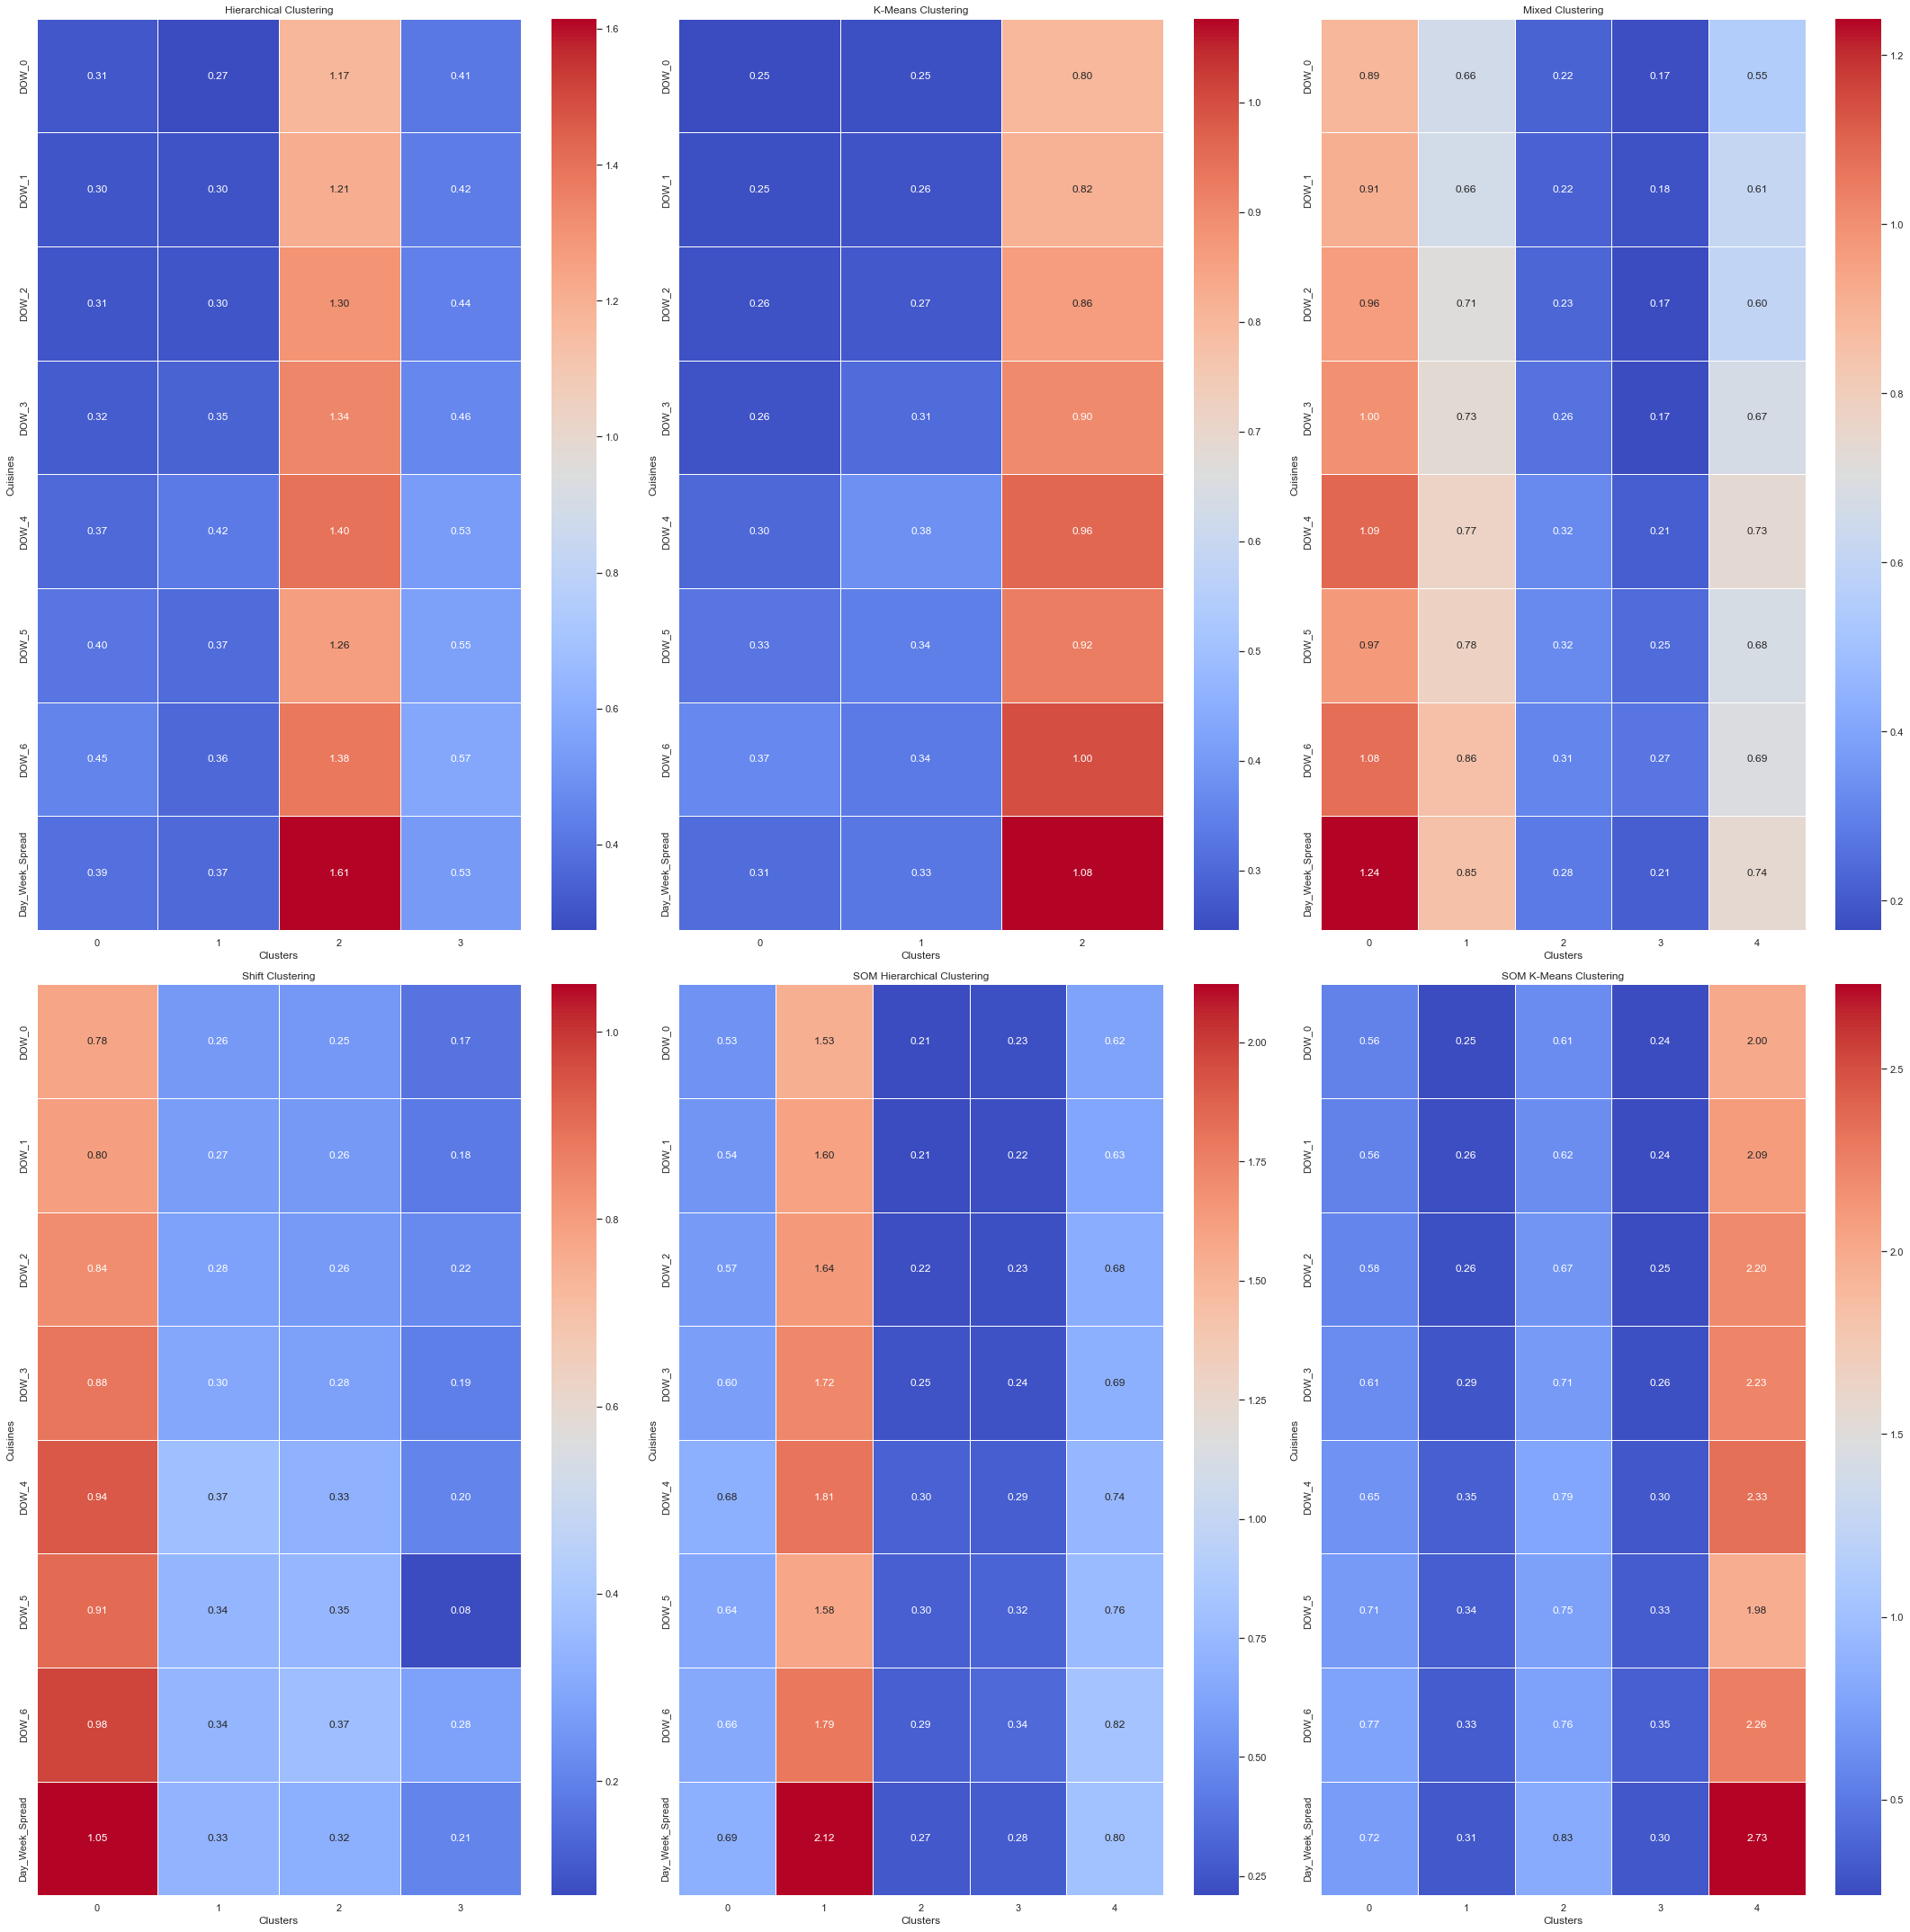

In [898]:
DOWS_collumns=[col for col in df.columns if col.startswith('DOW')]
DOWS_collumns=DOWS_collumns+['Day_Week_Spread']
# Create mean DataFrames for each clustering method
cluster_means_hierarchical = df_hierarchical_behaviour.groupby('cluster').mean()[DOWS_collumns].T
cluster_means_k = df_k_behaviour.groupby('cluster').mean()[DOWS_collumns].T
cluster_means_mixed = df_mixed_behaviour.groupby('cluster').mean()[DOWS_collumns].T
cluster_means_shift = df_shift_behaviour.groupby('cluster').mean()[DOWS_collumns].T
cluster_means_SOM_hie = df_SOM_hie_behaviour.groupby('cluster').mean()[DOWS_collumns].T
cluster_means_SOM_k = df_SOM_k_behaviour.groupby('cluster').mean()[DOWS_collumns].T

# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(30, 30))

# Heatmap for each clustering method
sns.heatmap(cluster_means_hierarchical, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Hierarchical Clustering')

sns.heatmap(cluster_means_k, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title('K-Means Clustering')

sns.heatmap(cluster_means_mixed, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 2])
axes[0, 2].set_title('Mixed Clustering')

sns.heatmap(cluster_means_shift, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Shift Clustering')

sns.heatmap(cluster_means_SOM_hie, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('SOM Hierarchical Clustering')

sns.heatmap(cluster_means_SOM_k, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 2])
axes[1, 2].set_title('SOM K-Means Clustering')

# Set common labels for each subplot
for ax in axes.flat:
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Cuisines')

# Adjust layout and display
plt.tight_layout()
plt.show()

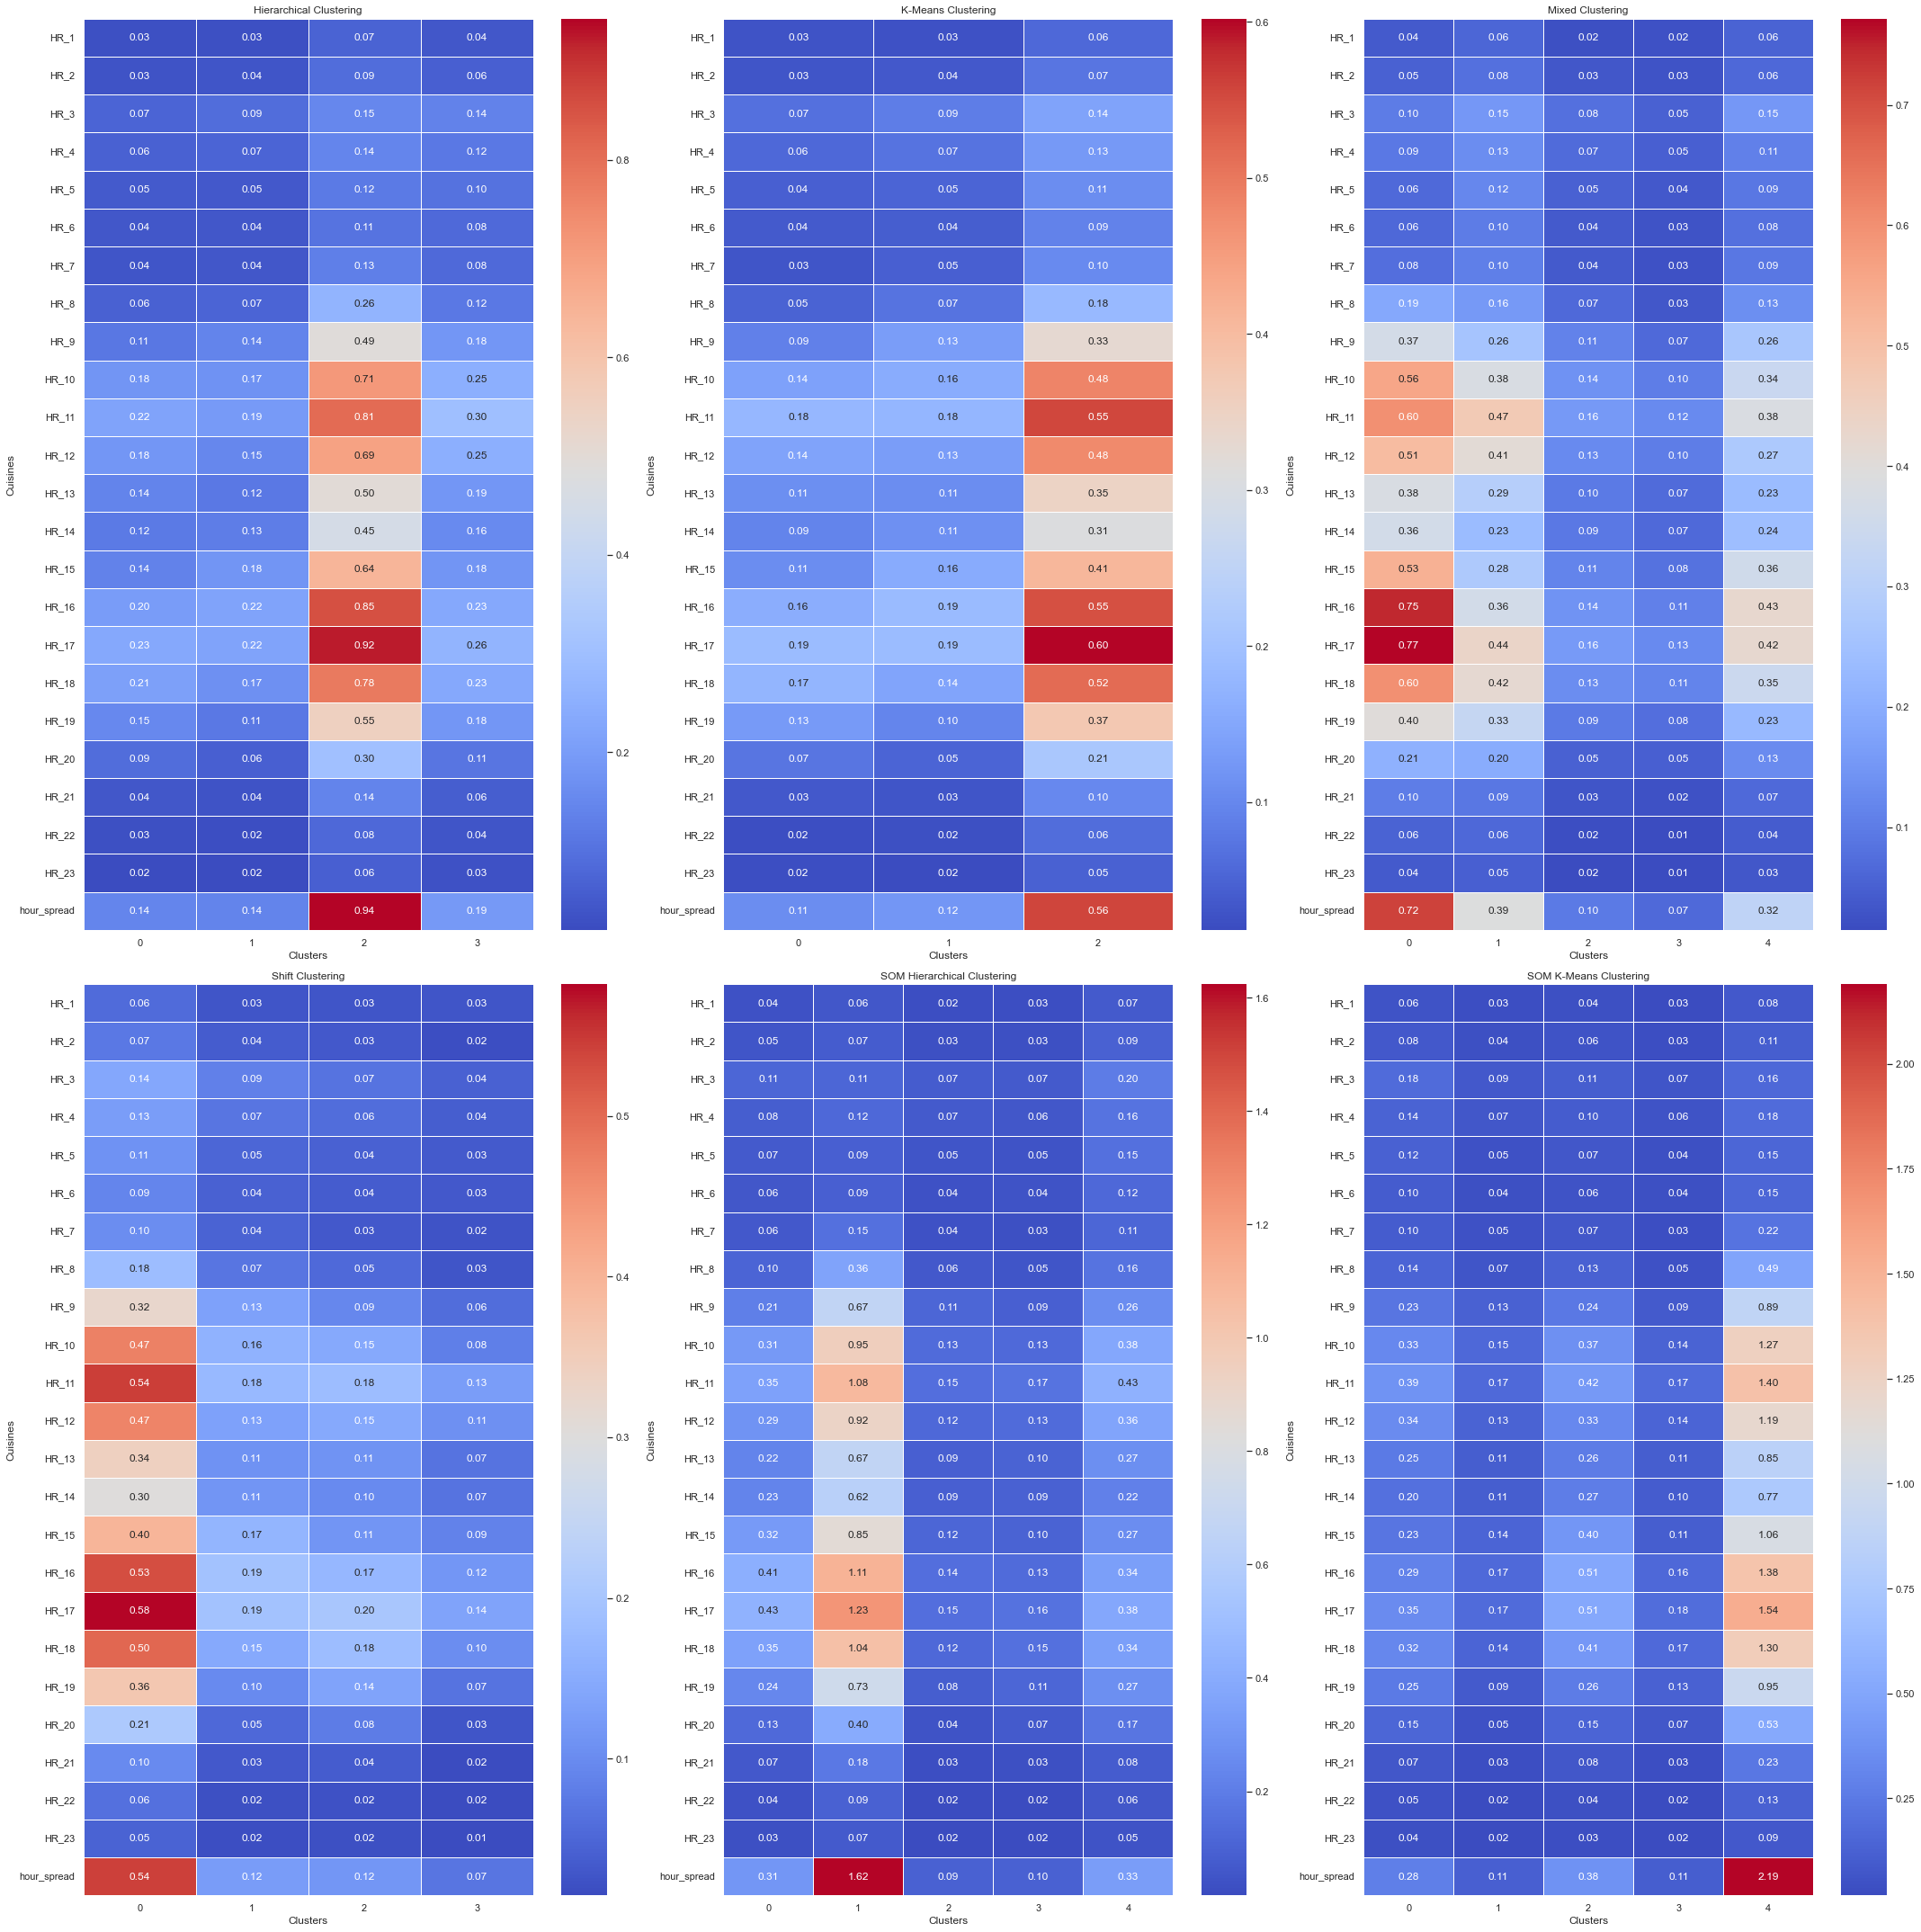

In [899]:
HR_collumns=[col for col in df.columns if col.startswith('HR')]
HR_collumns=HR_collumns+['hour_spread'] 
# Create mean DataFrames for each clustering method
cluster_means_hierarchical = df_hierarchical_behaviour.groupby('cluster').mean()[HR_collumns].T
cluster_means_k = df_k_behaviour.groupby('cluster').mean()[HR_collumns].T
cluster_means_mixed = df_mixed_behaviour.groupby('cluster').mean()[HR_collumns].T
cluster_means_shift = df_shift_behaviour.groupby('cluster').mean()[HR_collumns].T
cluster_means_SOM_hie = df_SOM_hie_behaviour.groupby('cluster').mean()[HR_collumns].T
cluster_means_SOM_k = df_SOM_k_behaviour.groupby('cluster').mean()[HR_collumns].T

# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(30, 30))

# Heatmap for each clustering method
sns.heatmap(cluster_means_hierarchical, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Hierarchical Clustering')

sns.heatmap(cluster_means_k, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title('K-Means Clustering')

sns.heatmap(cluster_means_mixed, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 2])
axes[0, 2].set_title('Mixed Clustering')

sns.heatmap(cluster_means_shift, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Shift Clustering')

sns.heatmap(cluster_means_SOM_hie, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('SOM Hierarchical Clustering')

sns.heatmap(cluster_means_SOM_k, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 2])
axes[1, 2].set_title('SOM K-Means Clustering')

# Set common labels for each subplot
for ax in axes.flat:
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Cuisines')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [900]:
df_hierarchical_behaviour.columns

Index(['vendor_count', 'product_count', 'is_chain', 'first_order',
       'last_order', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'Total_Spent', 'order_count', 'Diversity_Cuisine', 'costumer_time',
       'Intensity_of_Activity', 'Customer_loyalty', 'product_intensity',
       'Day_Week_Spread', 'hour_spread', 'cluster'],
      dtype='object')

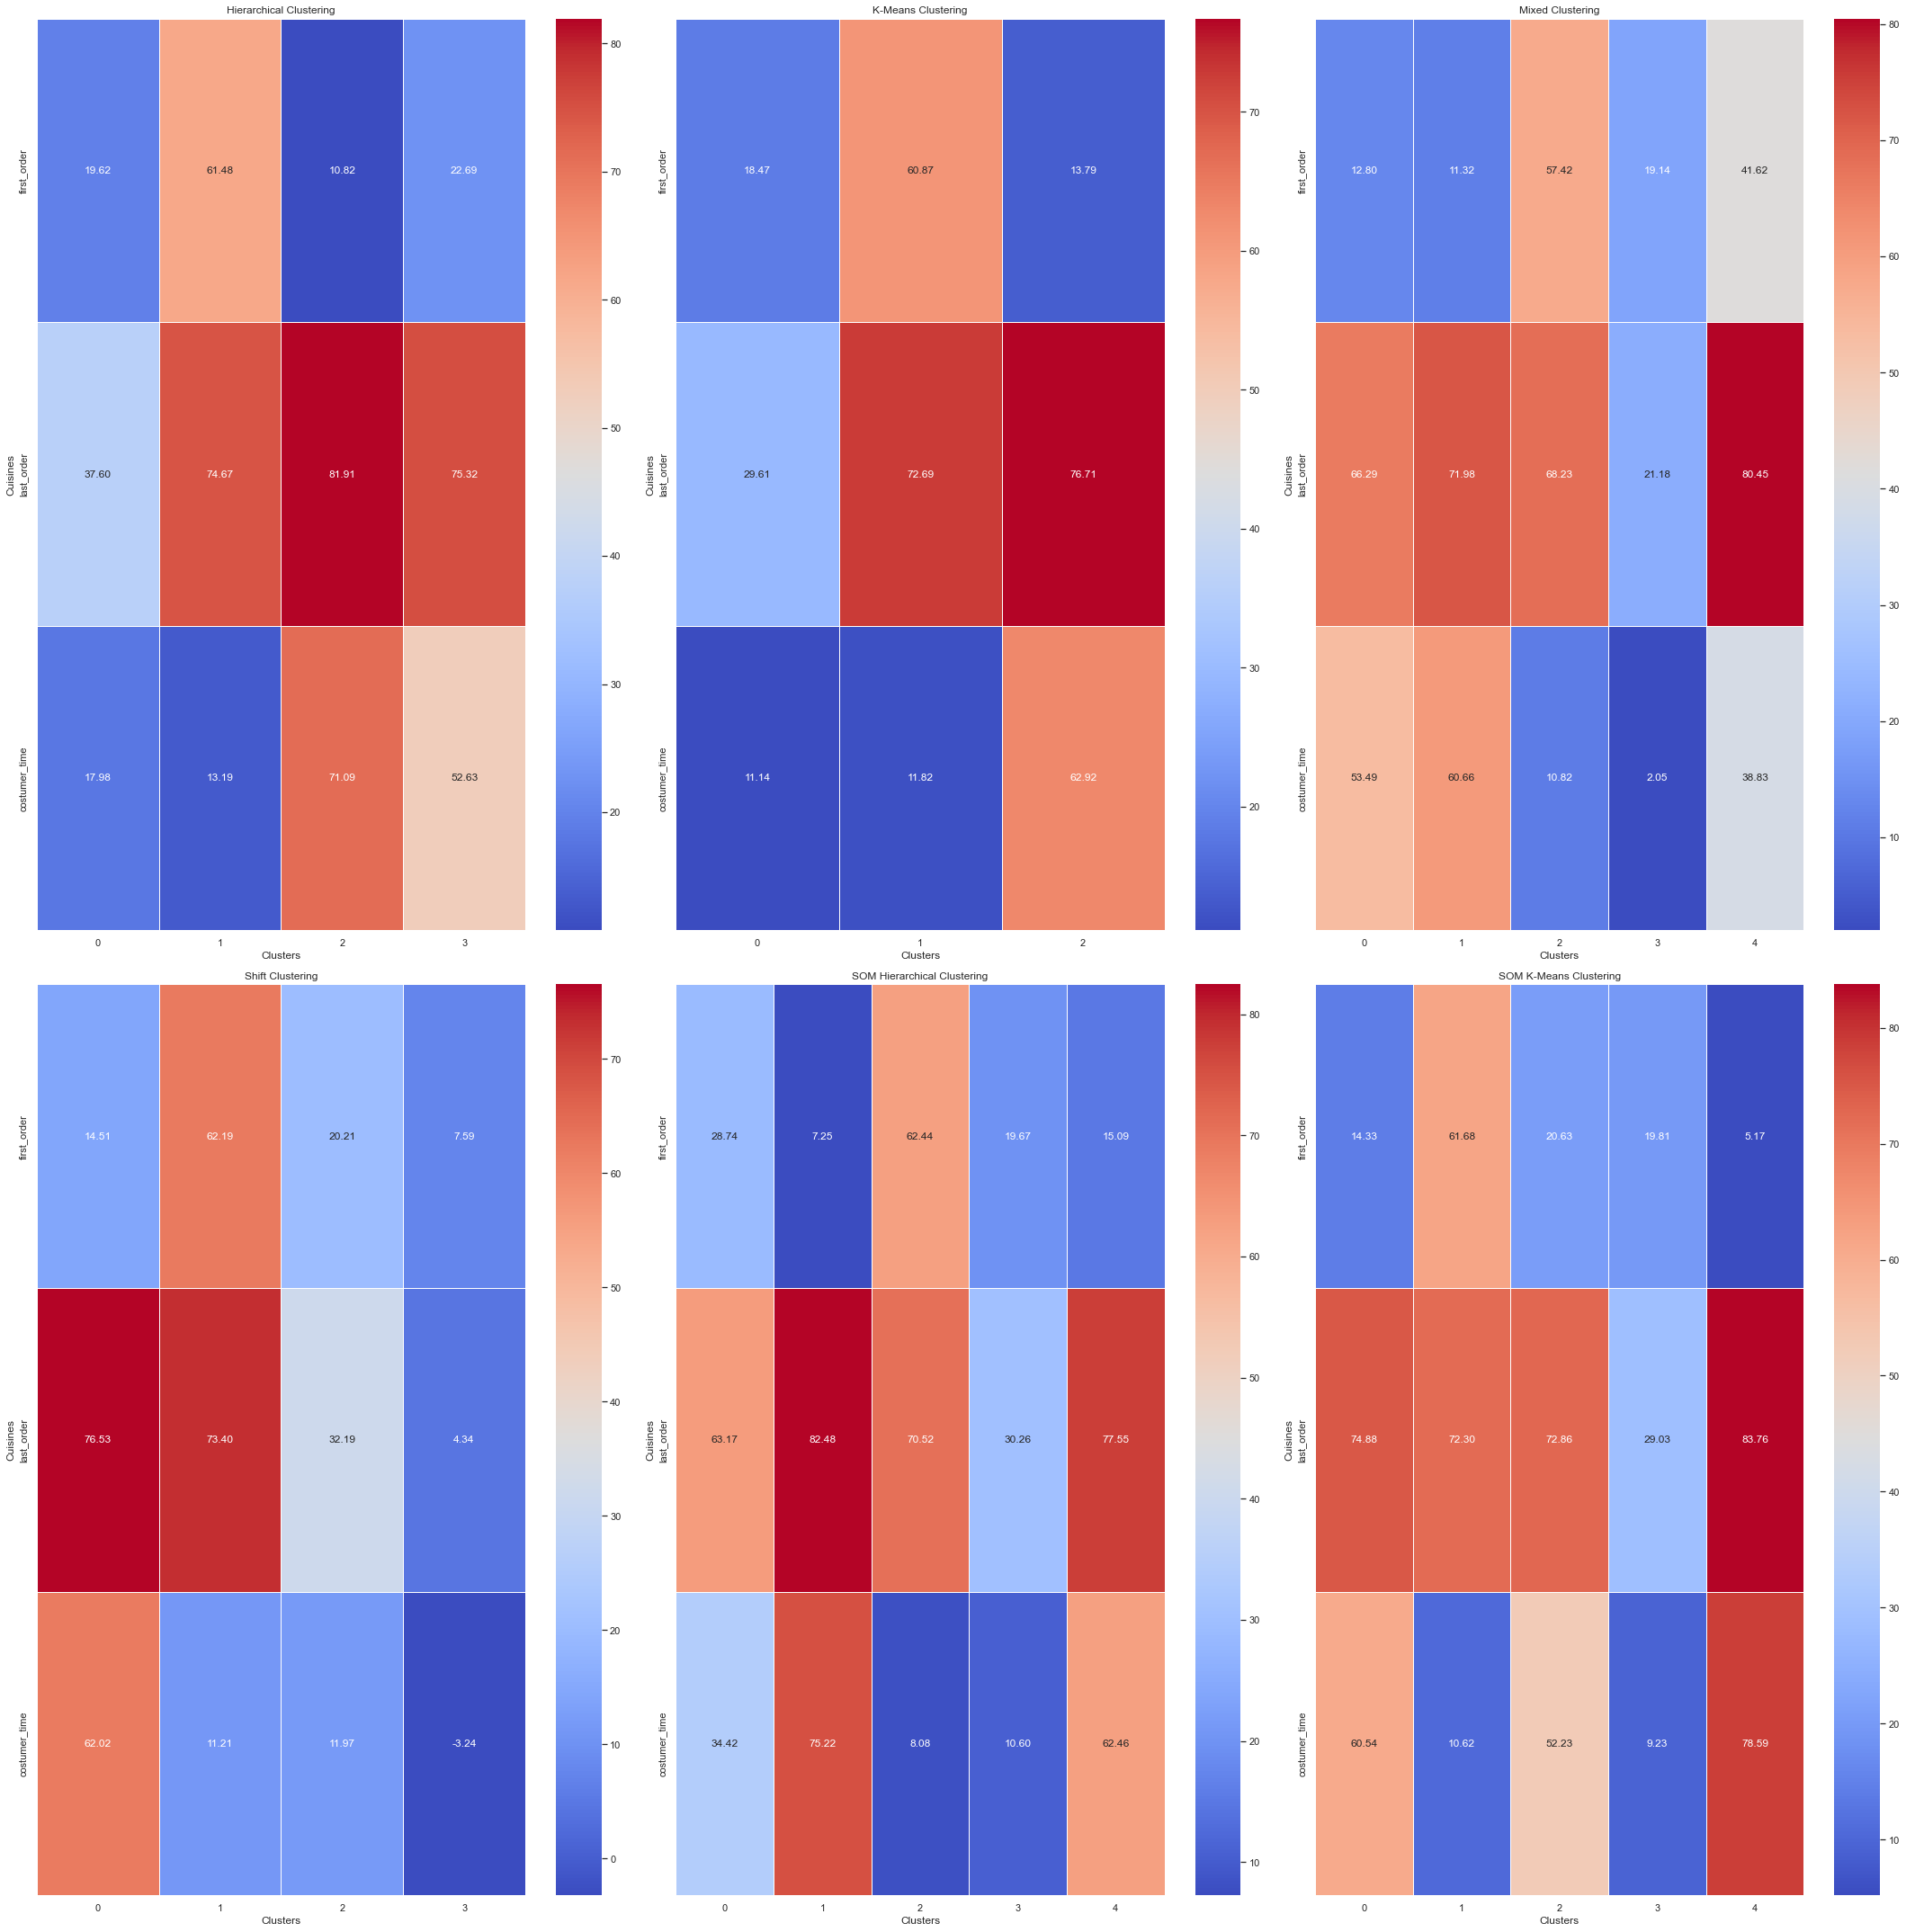

In [901]:
TIME_collumns=['first_order','last_order','costumer_time']
# Create mean DataFrames for each clustering method
cluster_means_hierarchical = df_hierarchical_behaviour.groupby('cluster').mean()[TIME_collumns].T
cluster_means_k = df_k_behaviour.groupby('cluster').mean()[TIME_collumns].T
cluster_means_mixed = df_mixed_behaviour.groupby('cluster').mean()[TIME_collumns].T
cluster_means_shift = df_shift_behaviour.groupby('cluster').mean()[TIME_collumns].T
cluster_means_SOM_hie = df_SOM_hie_behaviour.groupby('cluster').mean()[TIME_collumns].T
cluster_means_SOM_k = df_SOM_k_behaviour.groupby('cluster').mean()[TIME_collumns].T

# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(30, 30))

# Heatmap for each clustering method
sns.heatmap(cluster_means_hierarchical, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Hierarchical Clustering')

sns.heatmap(cluster_means_k, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title('K-Means Clustering')

sns.heatmap(cluster_means_mixed, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 2])
axes[0, 2].set_title('Mixed Clustering')

sns.heatmap(cluster_means_shift, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Shift Clustering')

sns.heatmap(cluster_means_SOM_hie, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('SOM Hierarchical Clustering')

sns.heatmap(cluster_means_SOM_k, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 2])
axes[1, 2].set_title('SOM K-Means Clustering')

# Set common labels for each subplot
for ax in axes.flat:
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Cuisines')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [902]:
collumns=['vendor_count','product_count','is_chain','order_count','Diversity_Cuisine','Intensity_of_Activity','Customer_loyalty','Total_Spent']

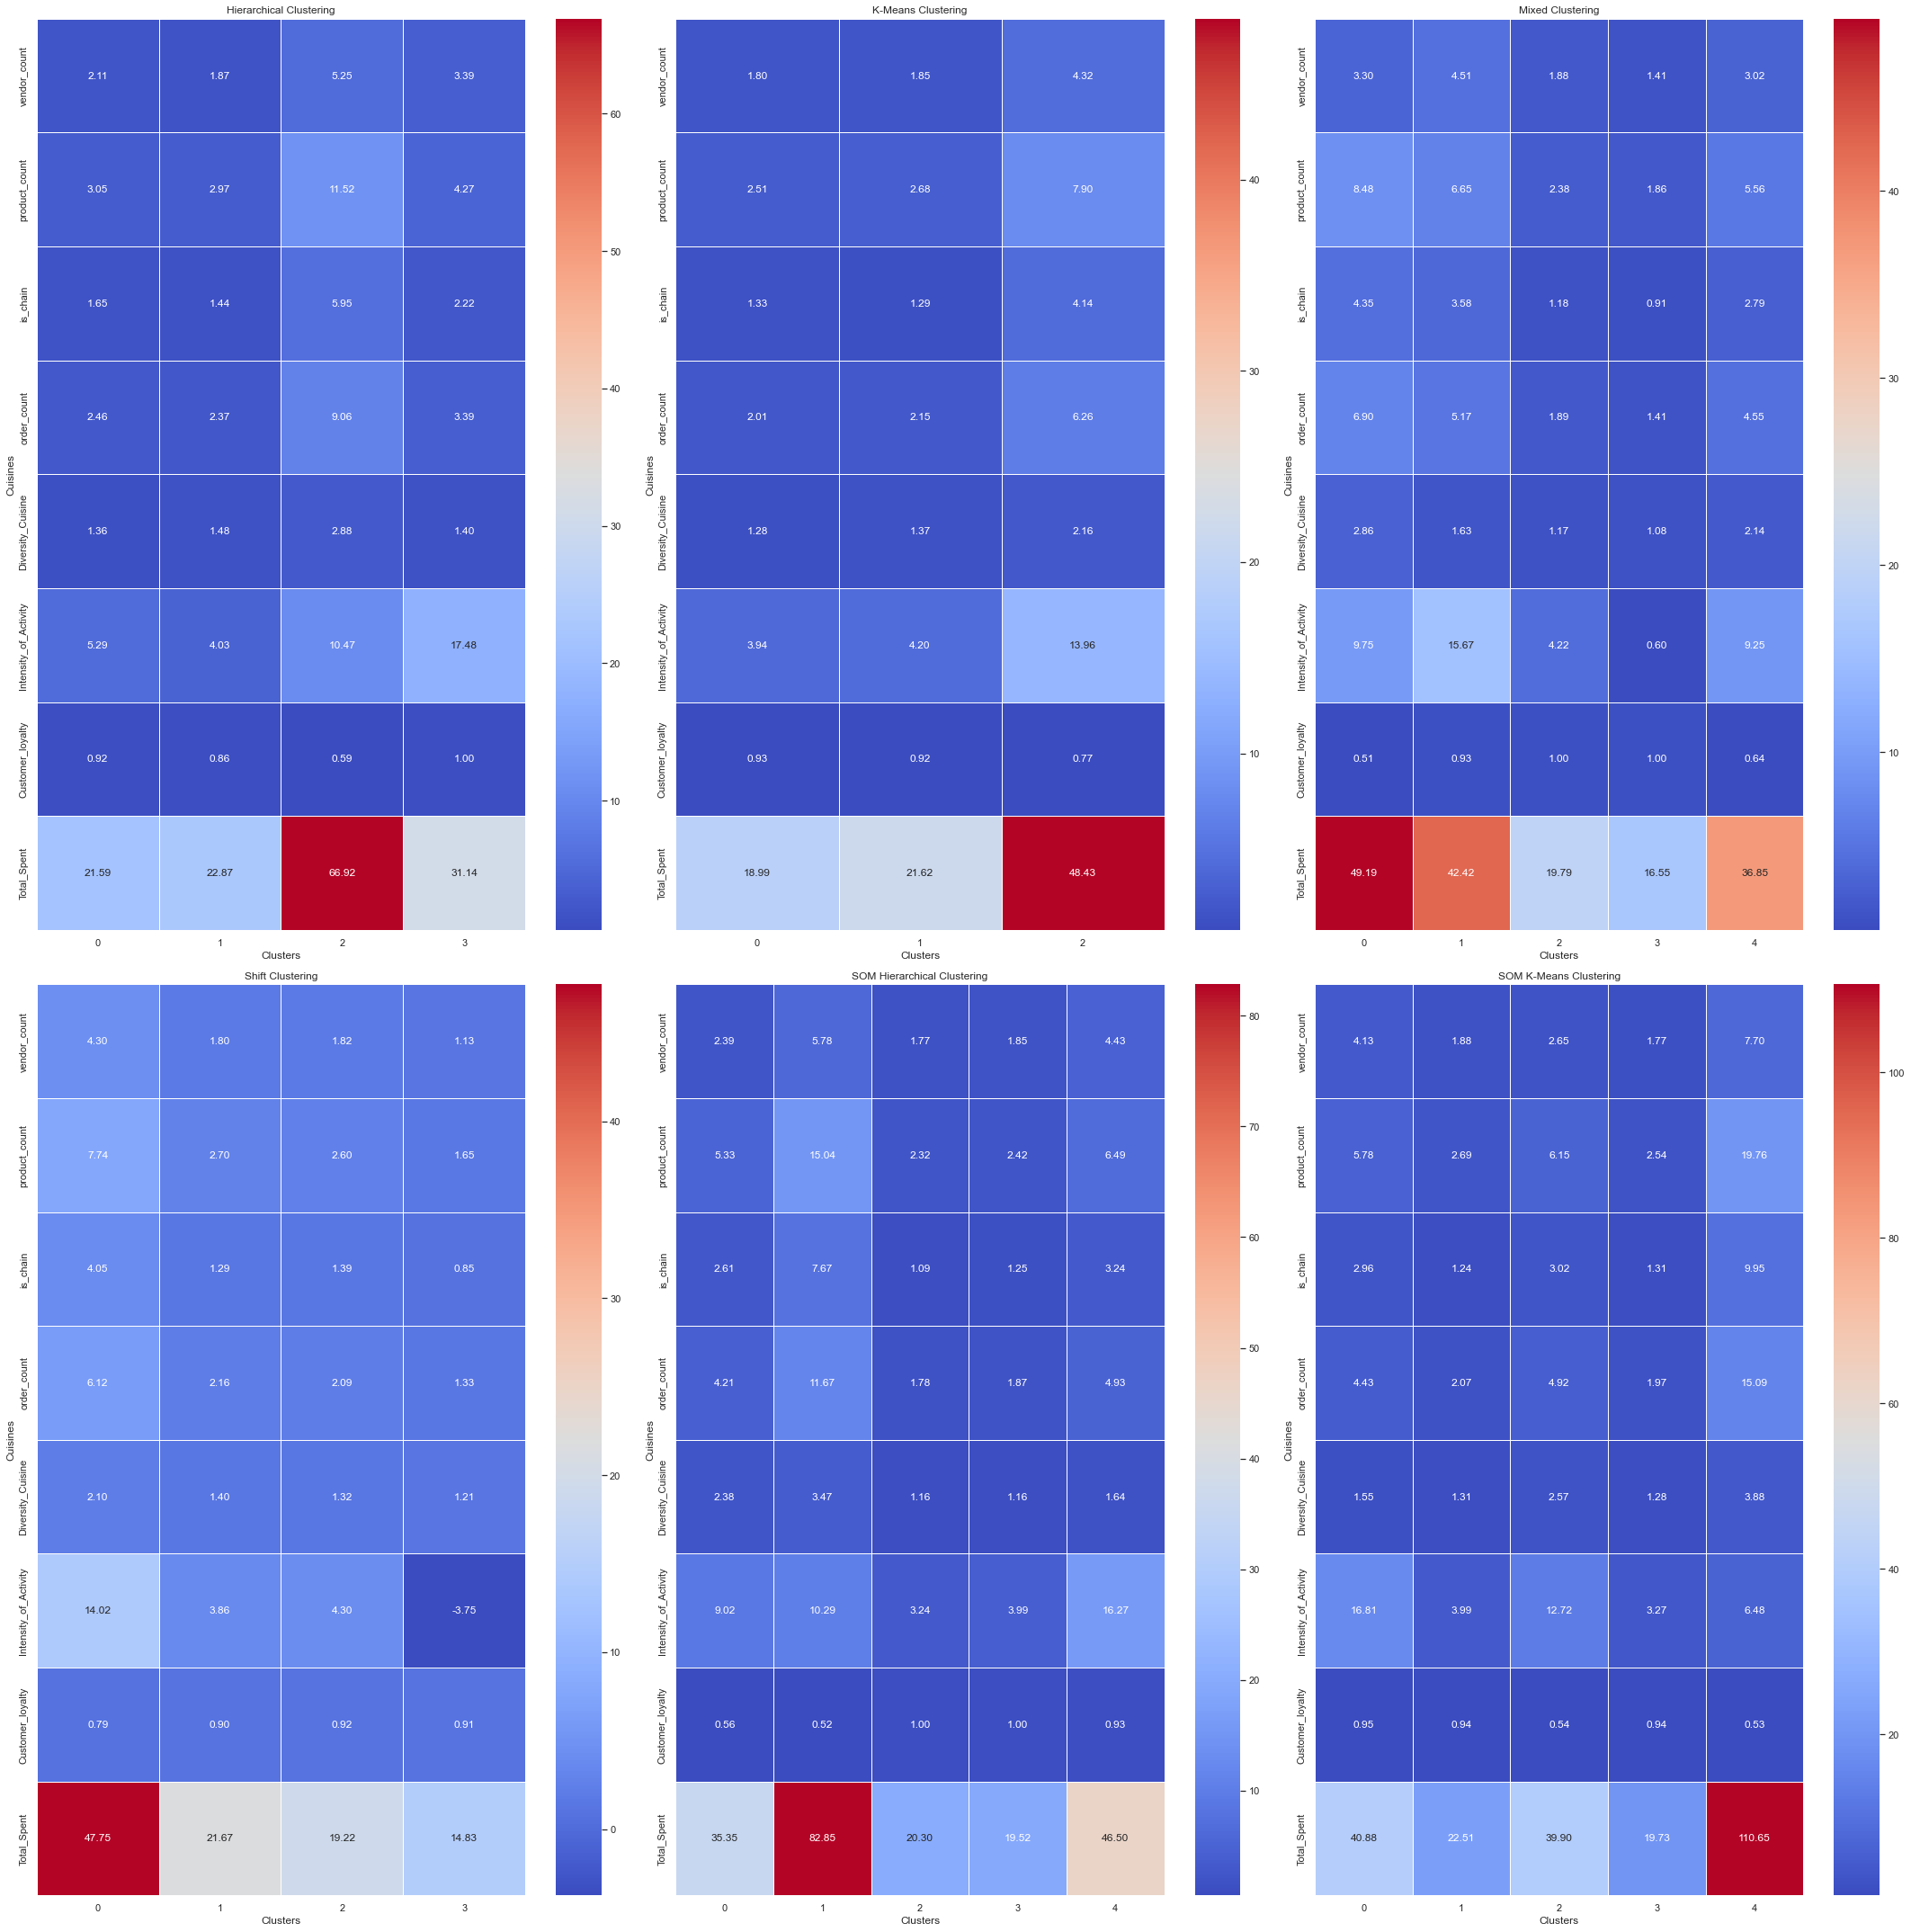

In [903]:
collumns=['vendor_count','product_count','is_chain','order_count','Diversity_Cuisine','Intensity_of_Activity','Customer_loyalty','Total_Spent']# Create mean DataFrames for each clustering method
cluster_means_hierarchical = df_hierarchical_behaviour.groupby('cluster').mean()[collumns].T
cluster_means_k = df_k_behaviour.groupby('cluster').mean()[collumns].T
cluster_means_mixed = df_mixed_behaviour.groupby('cluster').mean()[collumns].T
cluster_means_shift = df_shift_behaviour.groupby('cluster').mean()[collumns].T
cluster_means_SOM_hie = df_SOM_hie_behaviour.groupby('cluster').mean()[collumns].T
cluster_means_SOM_k = df_SOM_k_behaviour.groupby('cluster').mean()[collumns].T

# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(30, 30))

# Heatmap for each clustering method
sns.heatmap(cluster_means_hierarchical, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Hierarchical Clustering')

sns.heatmap(cluster_means_k, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title('K-Means Clustering')

sns.heatmap(cluster_means_mixed, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[0, 2])
axes[0, 2].set_title('Mixed Clustering')

sns.heatmap(cluster_means_shift, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Shift Clustering')

sns.heatmap(cluster_means_SOM_hie, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('SOM Hierarchical Clustering')

sns.heatmap(cluster_means_SOM_k, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=axes[1, 2])
axes[1, 2].set_title('SOM K-Means Clustering')

# Set common labels for each subplot
for ax in axes.flat:
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Cuisines')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [904]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

C:\Users\Casa-PC\AppData\Local\Temp/ipykernel_16056/4020636135.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cluster_labels)
C:\Users\Casa-PC\AppData\Local\Temp/ipykernel_16056/4020636135.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cluster_labels)
C:\Users\Casa-PC\AppData\Local\Temp/ipykernel_16056/4020636135.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cluster_labels)


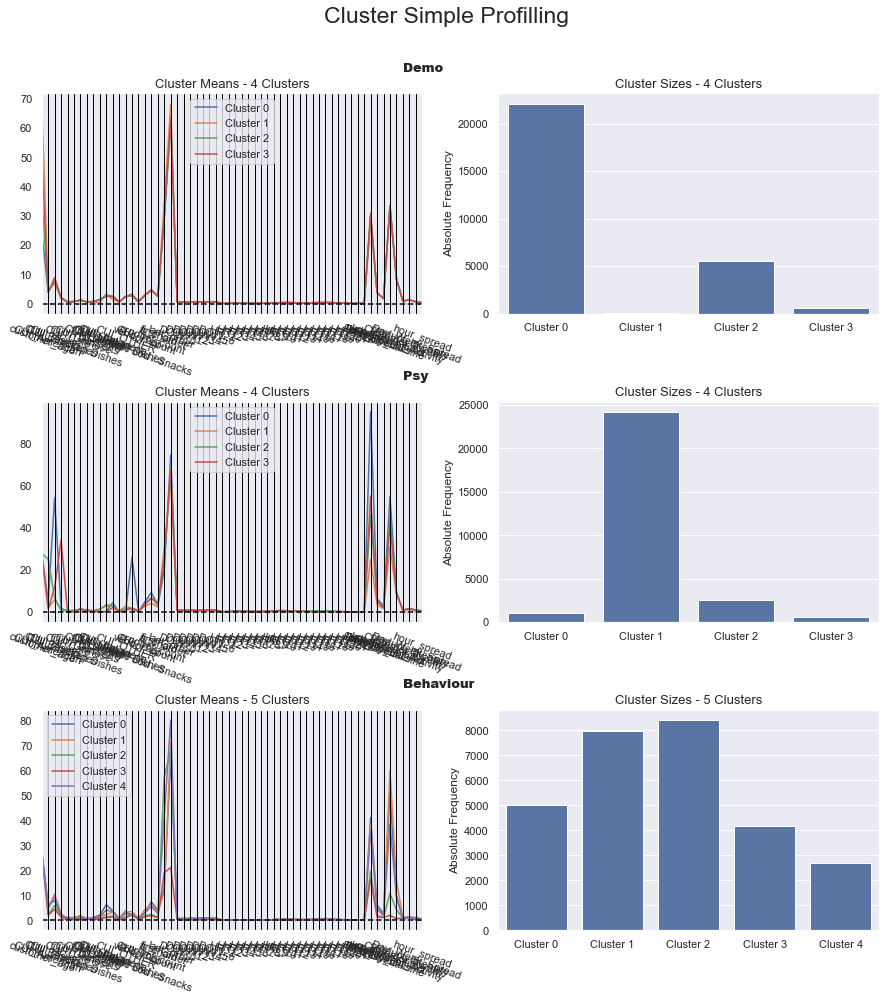

In [905]:
cluster_profiles(df_final,["cluster_demo","cluster_psy","cluster_behaviour"],figsize=(15,15),compar_titles=["Demo","Psy","Behaviour"])

In [906]:
df_mixed_demo.rename(columns={'cluster':'cluster_demo'},inplace=True)
df_hierarchical_psy.rename(columns={'cluster':'cluster_psy'},inplace=True)
df_mixed_behaviour.rename(columns={'cluster':'cluster_behaviour'},inplace=True)

In [909]:
df_final=pd.concat([df_mixed_demo,df_hierarchical_psy,df_mixed_behaviour,df],join='inner',axis=1)

# Customer region in each perspective

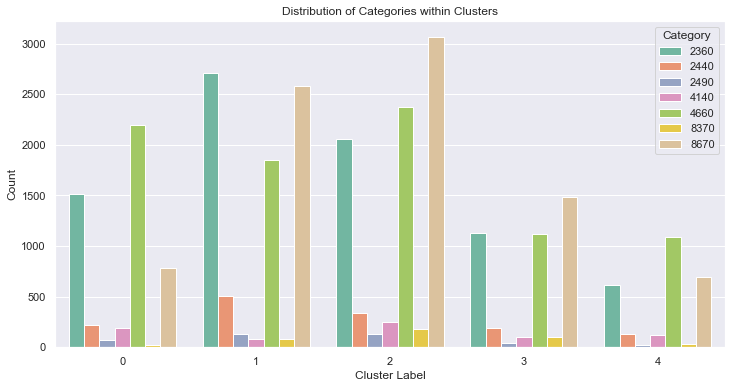

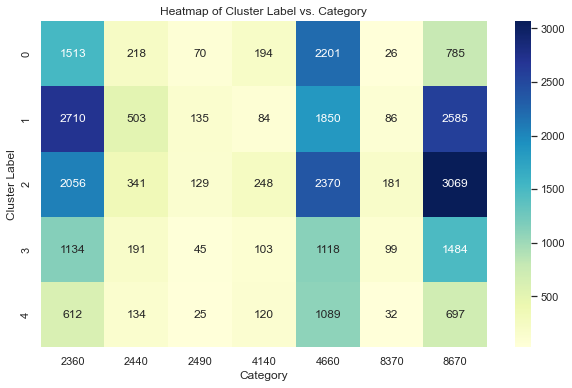

In [914]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='cluster_behaviour', hue='customer_region', palette='Set2')
plt.title('Distribution of Categories within Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

# Crosstab to compute the relationship between label and category
cross_tab = pd.crosstab(df_final['cluster_behaviour'], df_final['customer_region'])

# Heatmap for better visualization of crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Cluster Label vs. Category')
plt.xlabel('Category')
plt.ylabel('Cluster Label')
plt.show()